In [2]:
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline

# Let's take a look at the *Interactions_and_Impressions* Dataset :)

## Dataset import

In [3]:
import pandas as pd
path = "recommender-system-2022-challenge-polimi-data/interactions_and_impressions.csv"

Interactions_and_Impressions = pd.read_csv(filepath_or_buffer=path,
                               sep=",",
                               header=1,
                               engine='python',
                               names=['UserId', 'ItemId', 'ImpressionList', 'Data'])

This is what the dataset looks like:

In [4]:
Interactions_and_Impressions

,UserId,ItemId,ImpressionList,Data
0,0,21,NaN,0
1,0,21,NaN,0
2,0,21,"20,21,22,23,24,25,26,27,28,29",0
3,0,21,NaN,1
4,0,21,NaN,1
...,...,...,...,...
5826500,41628,20448,NaN,0
5826501,41628,20896,NaN,1
5826502,41628,21506,NaN,1
5826503,41628,22882,NaN,0


In [5]:
Interactions_and_Impressions.dtypes

UserId             int64
ItemId             int64
ImpressionList    object
Data               int64
dtype: object

In [6]:
Interactions_and_Impressions.describe()

,UserId,ItemId,Data
count,5.826505e+06,5.826505e+06,5.826505e+06
mean,1.899452e+04,4.641731e+03,3.877154e-01
std,1.117126e+04,6.533349e+03,4.872291e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.315000e+03,3.370000e+02,0.000000e+00
50%,1.893600e+04,1.448000e+03,0.000000e+00
75%,2.831300e+04,6.016000e+03,1.000000e+00
max,4.162800e+04,2.450600e+04,1.000000e+00


In [7]:
userId_unique = Interactions_and_Impressions["UserId"].unique()
itemId_unique = Interactions_and_Impressions["ItemId"].unique()
print("Number of users: {}".format(len(userId_unique)))
print("Number of items: {}".format(len(itemId_unique)))

Number of users: 41629
Number of items: 24507


In [8]:
print("Number of 0 interactions: {}".format(len(Interactions_and_Impressions[Interactions_and_Impressions['Data'] == 0])))
print("Number of 1 interactions: {}".format(len(Interactions_and_Impressions[Interactions_and_Impressions['Data'] == 1])))

Number of 0 interactions: 3567479
Number of 1 interactions: 2259026


Note that they are sorted by UserId

Let's group UserId+Data to see how frequent are 0 and 1 interactions for each user

In [9]:
Group_byType = Interactions_and_Impressions.drop(['ImpressionList'], axis=1)
Group_byType = Group_byType.groupby(['UserId', 'Data'], as_index=False).count()
Group_byType

,UserId,Data,ItemId
0,0,0,17
1,0,1,139
2,1,0,14
3,1,1,8
4,2,0,90
...,...,...,...
83231,41626,1,9
83232,41627,0,130
83233,41627,1,3
83234,41628,0,15


In [10]:
print('Number of 0 interactions of User 0 is {}'.format(len(Interactions_and_Impressions[(Interactions_and_Impressions['Data'] == 0) & (Interactions_and_Impressions['UserId'] == 0)])))
print('Number of 1 interactions of User 0 is {}'.format(len(Interactions_and_Impressions[(Interactions_and_Impressions['Data'] == 1) & (Interactions_and_Impressions['UserId'] == 0)])))

Number of 0 interactions of User 0 is 17
Number of 1 interactions of User 0 is 139


In [11]:
print("The mean number of 0 interactions per User is {}".format(Group_byType[Group_byType['Data'] == 0].ItemId.mean()))
print("The mean number of 1 interactions per User is {}".format(Group_byType[Group_byType['Data'] == 1].ItemId.mean()))
print("")
print("The 25% quantile number of 0 interactions per User is {}".format(Group_byType[Group_byType['Data'] == 0].ItemId.quantile(.25)))
print("The 25% quantile number of 1 interactions per User is {}".format(Group_byType[Group_byType['Data'] == 1].ItemId.quantile(.25)))
print("")
print("The 75% quantile number of 0 interactions per User is {}".format(Group_byType[Group_byType['Data'] == 0].ItemId.quantile(.75)))
print("The 75% quantile number of 1 interactions per User is {}".format(Group_byType[Group_byType['Data'] == 1].ItemId.quantile(.75)))
print("")
print("The max number of 0 interactions per User is {}".format(Group_byType[Group_byType['Data'] == 0].ItemId.max()))
print("The max number of 1 interactions per User is {}".format(Group_byType[Group_byType['Data'] == 1].ItemId.max()))
print("\n")

The mean number of 0 interactions per User is 85.69696605731582
The mean number of 1 interactions per User is 54.294373542913455

The 25% quantile number of 0 interactions per User is 17.0
The 25% quantile number of 1 interactions per User is 6.0

The 75% quantile number of 0 interactions per User is 83.0
The 75% quantile number of 1 interactions per User is 40.0

The max number of 0 interactions per User is 5155
The max number of 1 interactions per User is 5815




#### Now without differentiating 0 and 1 interactions

In [12]:
Group_user = Interactions_and_Impressions.drop(['ImpressionList', 'Data'], axis=1)
Group_user = Group_user.groupby(['UserId'], as_index=False).count()
Group_user

,UserId,ItemId
0,0,156
1,1,22
2,2,238
3,3,349
4,4,1458
...,...,...
41624,41624,57
41625,41625,22
41626,41626,28
41627,41627,133


Sorted by ItemId count:

In [13]:
Group_user.sort_values("ItemId")

,UserId,ItemId
38400,38400,5
25061,25061,6
41083,41083,6
30257,30257,6
38965,38965,7
...,...,...
18296,18296,5854
7445,7445,5916
1186,1186,6353
18764,18764,7670


Some Statistics:

In [56]:
print("The mean number of interactions per User is {}".format(Group_user.ItemId.mean()))
print("")
print("The 25% quantile number of interactions per User is {}".format(Group_user.ItemId.quantile(.25)))
print("")
print("The 75% quantile number of interactions per User is {}".format(Group_user.ItemId.quantile(.75)))
print("")
print("The max number of interactions per User is {}".format(Group_user.ItemId.max()))
print("\n")

The mean number of interactions per User is 139.9626462321939

The 25% quantile number of interactions per User is 28.0

The 75% quantile number of interactions per User is 139.0

The max number of interactions per User is 7798




Let's see them on a graph

In [57]:
sorted_items = Group_user.ItemId.values.copy()

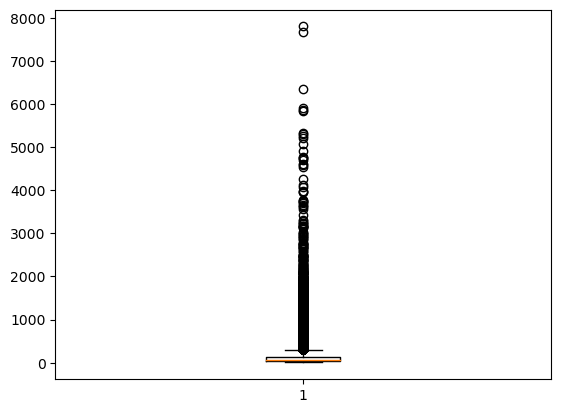

In [58]:
import matplotlib.pyplot as pyplot

pyplot.boxplot(sorted_items)
# fig = pyplot.figure(figsize = (100,70))
pyplot.show()

The fact the box is so small in the graph means that there are a big number of big outliers

### Finding User Outliers
With a mathematical approach

In [59]:
def find_outliers(data, percentage):
    # the first quartile
    q1 = data.quantile(percentage)

    # the 3rd quartile
    q3 = data.quantile(1-percentage)

    # the iqr region
    iqr = q3 - q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    return (upper_bound, lower_bound)

In [60]:
(user_upper_bound, user_lower_bound) = find_outliers(Group_user.ItemId, 0.10)
user_upper_bound, user_lower_bound

(785.0, -439.0)

The lower bound is negative so we can't have any "low outlier"

In [61]:
user_outliers = Group_user[Group_user['ItemId'] >= user_upper_bound]
print("The number of outliers is {}".format(len(user_outliers)))

The number of outliers is 1012


In [62]:
user_outliers

,UserId,ItemId
4,4,1458
11,11,812
86,86,1644
115,115,979
126,126,1096
...,...,...
41245,41245,794
41254,41254,1181
41403,41403,1488
41467,41467,2085


### Finding Item Outliers

In [63]:
Group_item = Interactions_and_Impressions.drop(['ImpressionList', 'Data'], axis=1).drop_duplicates() # drop duplicates + the two columns
Group_item

,UserId,ItemId
0,0,21
12,0,22
27,0,24
28,0,44
29,0,54
...,...,...
5826500,41628,20448
5826501,41628,20896
5826502,41628,21506
5826503,41628,22882


In [32]:
Group_item = Group_item.groupby(['ItemId'], as_index=False).count()
Group_item

,ItemId,UserId
0,0,41
1,1,87
2,2,50
3,3,63
4,4,66
...,...,...
24502,24502,22
24503,24503,31
24504,24504,25
24505,24505,24


In [33]:
print("The mean number of interactions per Item is {}".format(Group_item.UserId.mean()))
print("")
print("The 25% quantile number of interactions per Item is {}".format(Group_item.UserId.quantile(.25)))
print("")
print("The 75% quantile number of interactions per Item is {}".format(Group_item.UserId.quantile(.75)))
print("")
print("The max number of interactions per Item is {}".format(Group_item.UserId.max()))
print("\n")

The mean number of interactions per Item is 63.43652833884197

The 25% quantile number of interactions per Item is 29.0

The 75% quantile number of interactions per Item is 46.0

The max number of interactions per Item is 9481




In [34]:
outliers_ratio = 0.10
(item_upper_bound, item_lower_bound) = find_outliers(Group_item.UserId, outliers_ratio)   # outliers are outside these bounds
item_upper_bound, item_lower_bound

(182.5, -69.5)

In [42]:
item_outliers = Group_item[Group_item['UserId'] >= item_upper_bound]
print("The number of Item outliers is {}".format(len(item_outliers)))
print("The total number of Items is {}, so outliers are the {:.3f}%".format(len(itemId_unique), len(item_outliers)/len(itemId_unique)*100))

The number of Item outliers is 1070
The total number of Items is 24507, so outliers are the 4.366%


In [41]:
item_outliers

,ItemId,UserId
5,5,658
6,6,455
7,7,248
19,19,485
20,20,5016
...,...,...
22782,22782,273
22844,22844,187
22864,22864,372
22894,22894,214


# Stats about the dataframe:

#### Let's remove empty indeces:

In [43]:
mapped_id, original_id = pd.factorize(Interactions_and_Impressions["UserId"].unique())
user_original_Id_to_index = pd.Series(mapped_id, index=original_id)

mapped_id, original_id = pd.factorize(Interactions_and_Impressions["ItemId"].unique())
item_original_Id_to_index = pd.Series(mapped_id, index=original_id)
item_original_Id_to_index

21           0
22           1
24           2
44           3
54           4
         ...  
19714    24502
19075    24503
20006    24504
20177    24505
2538     24506
Length: 24507, dtype: int64

In [198]:
original_item_Id = 21
print("New index for item {} is {}".format(original_item_Id, item_original_Id_to_index[original_item_Id]))

New index for item 21 is 0


In [199]:
Interactions_and_Impressions["UserId"] = Interactions_and_Impressions["UserId"].map(user_original_Id_to_index)
Interactions_and_Impressions["ItemId"] = Interactions_and_Impressions["ItemId"].map(item_original_Id_to_index)

In [200]:
Interactions_and_Impressions

,UserId,ItemId,ImpressionList,Data
0,0,0,NaN,0
1,0,0,NaN,0
2,0,0,"20,21,22,23,24,25,26,27,28,29",0
3,0,0,NaN,1
4,0,0,NaN,1
...,...,...,...,...
5826500,41628,3699,NaN,0
5826501,41628,12693,NaN,1
5826502,41628,15131,NaN,1
5826503,41628,18127,NaN,0


#### How to get back original IDs:

In [220]:
# to revert the mapping:
item_original_Id_to_index[item_original_Id_to_index==3].index.item()

44

### Average interactions per user/item:

In [202]:
userId_unique = Interactions_and_Impressions["UserId"].unique()
itemId_unique = Interactions_and_Impressions["ItemId"].unique()

n_users = len(userId_unique)
n_items = len(itemId_unique)
n_interactions = len(Interactions_and_Impressions)

print ("Number of items\t {}, Number of users\t {}".format(n_items, n_users))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemId_unique), max(userId_unique)))
print ("Average interactions per user {:.2f}".format(n_interactions/n_users))
print ("Average interactions per item {:.2f}\n".format(n_interactions/n_items))

Number of items	 24507, Number of users	 41629
Max ID items	 24506, Max Id users	 41628

Average interactions per user 139.96
Average interactions per item 237.75



### Interactions distribution on users
We'll take a look at the distribution of interactions and impressions on users.
1) first we'll consider all interactions (both Data=0 and Data=1) separately
2) then we'll get rid of multiple interactions (ie: we'll count all interactions on the same item as one)
3) lastly we'll compare the two results

#### (1) All Interactions

In [203]:
g = Interactions_and_Impressions.groupby('UserId')
g

In [204]:
sizes = []
for user_id, user_id_df in g:
    sizes.append(len(user_id_df))

activities_per_user = pd.Series(data=sizes, index=range(0, len(userId_unique)))
activities_per_user

0         156
1          22
2         238
3         349
4        1458
         ... 
41624      57
41625      22
41626      28
41627     133
41628      23
Length: 41629, dtype: int64

#### Note that the majority of users have few interactions (less then 1000) - (!) multiple impressions on the same item are considered separately

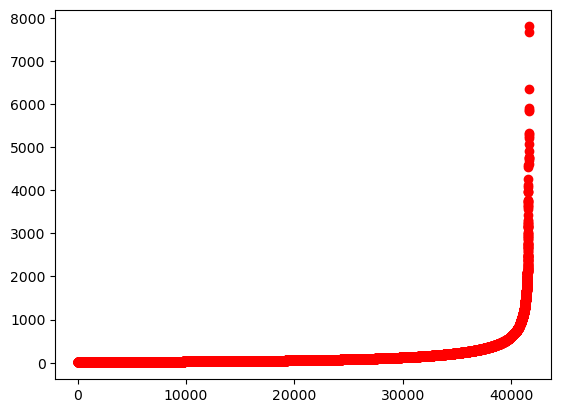

In [205]:

n_activities_per_user = activities_per_user.values.copy()
n_activities_per_user.sort()

pyplot.plot(n_activities_per_user, 'ro')


#### (2) Without considering multiple interactions
Ie: let's throw away the Data and ImpressionList column and all duplicates row

In [206]:
Distinct_Interactions = Interactions_and_Impressions.copy(deep=True)
Distinct_Interactions = Distinct_Interactions.drop(["ImpressionList", "Data"], axis=1)
Distinct_Interactions = Distinct_Interactions.drop_duplicates()

In [207]:
Distinct_Interactions

,UserId,ItemId
0,0,0
12,0,1
27,0,2
28,0,3
29,0,4
...,...,...
5826500,41628,3699
5826501,41628,12693
5826502,41628,15131
5826503,41628,18127


This time instead of using gropBy I'll use the properties of SciPy sparce matrices

In [208]:
import scipy.sparse as sps

# we want the matrix to be a binary matrix
data = np.ones(len(Distinct_Interactions))

# The COO constructor expects (data, (row, column))
implicit_URM = sps.coo_matrix((data, 
                               (Distinct_Interactions["UserId"].values, Distinct_Interactions["ItemId"].values)))
implicit_URM

<41629x24507 sparse matrix of type '<class 'numpy.float64'>'
	with 1554639 stored elements in COOrdinate format>

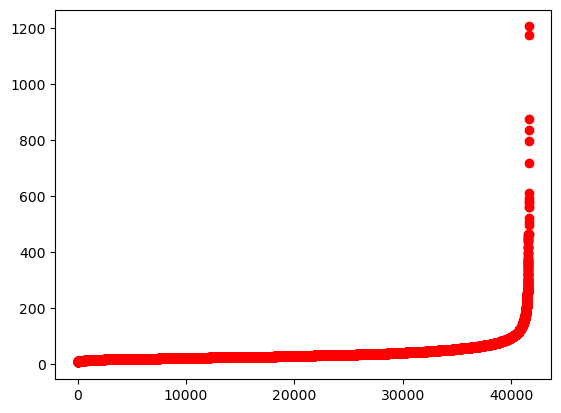

In [209]:
interactions_per_user = np.ediff1d(implicit_URM.tocsr().indptr)
interactions_per_user = np.sort(interactions_per_user)

pyplot.plot(interactions_per_user, 'ro')
pyplot.show()

The shape of the graph is roughly the same but the number of interactions is significantly lower

#### (3) Let's try comparing the two results, ie: see if getting rid of multiple interactions changes which users have more of them

Firstly with duplicates:

In [210]:
Interactions_and_Impressions.head(10)

,UserId,ItemId,ImpressionList,Data
0,0,0,NaN,0
1,0,0,NaN,0
2,0,0,"20,21,22,23,24,25,26,27,28,29",0
3,0,0,NaN,1
4,0,0,NaN,1
5,0,0,NaN,1
6,0,0,NaN,1
7,0,0,NaN,1
8,0,0,NaN,1
9,0,0,NaN,1


In [211]:
sizes = []
for user_id, user_id_df in g:
    sizes.append(len(user_id_df))

activities_per_user = pd.Series(data=sizes, index=range(0, len(userId_unique)))
activities_per_user

0         156
1          22
2         238
3         349
4        1458
         ... 
41624      57
41625      22
41626      28
41627     133
41628      23
Length: 41629, dtype: int64

In [212]:
activities_per_user = activities_per_user.sort_values()
activities_per_user

38400       5
25061       6
41083       6
30257       6
38965       7
         ... 
18296    5854
7445     5916
1186     6353
18764    7670
390      7798
Length: 41629, dtype: int64

In [213]:
order = activities_per_user.index
order

Int64Index([38400, 25061, 41083, 30257, 38965,    97, 38674, 21852, 21810,
            11537,
            ...
             1610, 19407, 17868,  9723, 22372, 18296,  7445,  1186, 18764,
              390],
           dtype='int64', length=41629)

Now getting rid of duplicates:

In [214]:
implicit_copy = implicit_URM.copy().tocsr()
interactions_per_user = pd.Series(data=np.ediff1d(implicit_copy.indptr) , index=range(0, len(userId_unique)))
interactions_per_user

0         65
1         21
2        103
3        127
4         39
        ... 
41624     38
41625     21
41626     23
41627     53
41628     23
Length: 41629, dtype: int32

In [215]:
Distinct_Interactions.head(66) # just to check

,UserId,ItemId
0,0,0
12,0,1
27,0,2
28,0,3
29,0,4
...,...,...
152,0,61
153,0,62
154,0,63
155,0,64


Now we have two Pandas Series containing number of interactions in the two scenarios:
##### Let's plot them
We'll take the sorting of the first case to see the differences between the two

In [216]:
interactions_per_user[order]

38400      5
25061      6
41083      6
30257      6
38965      7
        ... 
18296     47
7445      67
1186      71
18764    612
390       90
Length: 41629, dtype: int32

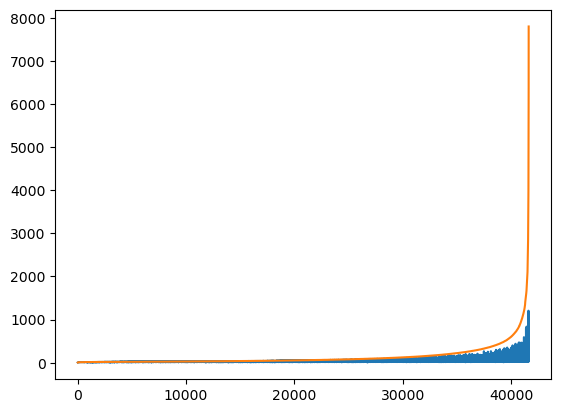

In [217]:
pyplot.plot(interactions_per_user[order].values) #without considering multiple, blue
pyplot.plot(activities_per_user[order].values) #considering multiple, orange

##### -> we see from the graph that getting rid of multiple interactions doesn't produce huge changes

In [218]:
np.max(implicit_URM)

1.0